## 1. La legge dei grandi numeri

La legge dei grandi numeri è un teorema fondamentale della teoria della probabilità che indica che se ripetiamo molte volte (tendendo all'infinito) lo stesso esperimento, la frequenza di un certo evento tende ad essere costante.

Vale a dire, **la legge dei grandi numeri indica che se lo stesso test viene eseguito ripetutamente (ad esempio, lancio di una moneta), la frequenza con cui si ripeterà un determinato evento (testa/croce) si avvicinerà a una costante. Questa a sua volta sarà la probabilità che questo evento si verifichi.**

Fonte: https://it.economy-pedia.com/11038376-law-of-the-big-numbers

- Scrivere una funzione che simula il lancio di una moneta per N volte e restituisce la frequenza % di volte che è uscita testa.
- Calcolare la frequenza % con la grandezze del campione (numero di lanci) che varia 100 volte da 10 a 20000. Ottengo quindi 100 valori.
- Fare il plot del Numero medio di teste (y) rispetto alla grandezza del campione (x)





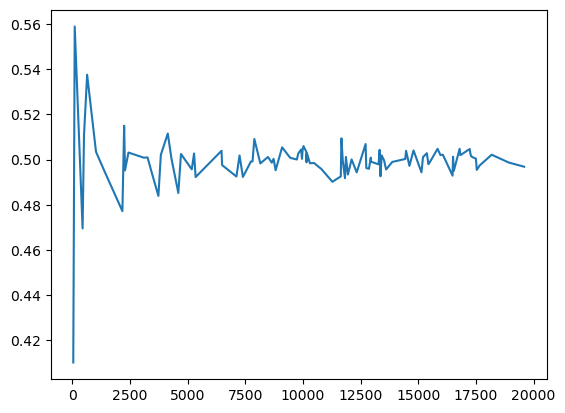

In [32]:
from pandas import *
import numpy as n 
from matplotlib.pyplot import *
from random import *
def f(x):
    xx = n.random.choice(a = [0, 1], p=[ 0.5, 0.5], size = x, replace=True) #0 croce, 1 testa
    return (n.count_nonzero(xx == 1) / x)

e1 = []
e2 = []
for i in range (100):
    x = randint(10,20001)
    e1.append(f(x))
    e2.append(x)

e12 = DataFrame({"size" : e2, "value": e1})
e12 = e12.sort_values("size")

plot(e12["size"],e12["value"])

## 2. Analisi del Dataset Titanic
- Quante righe e colonne ha il dataset?
- Controlla quanti valori mancanti ci sono per colonna
- Riempi i valori mancanti nella colonna 'Embarked' con il valore più frequente
- Rimuovi le righe dove il valore di 'Age' è mancante
- Controlla se ci sono righe duplicate
- Calcola l'età media dei passeggeri per ogni classe (`Pclass`), se ci sono valori mancanti di età riempili con il valore medio
- Visualizza la distribuzione dell'età per classe
- Visualizza la distribuzione dell'età per classe dividendo e mmostrando insieme i dati di uomini e donne

In [179]:
# 📦 Caricamento del dataset
import pandas as p
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = p.read_csv(url)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


8568 12
29.69911764705882


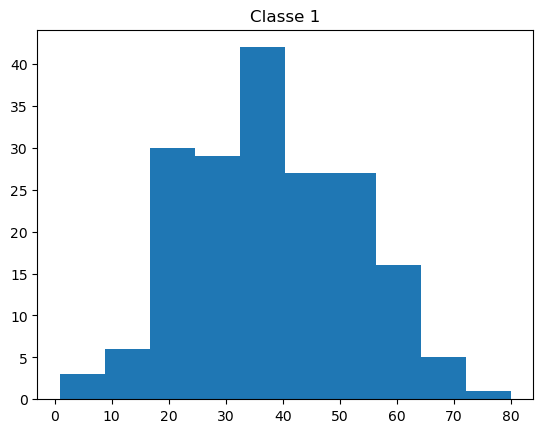

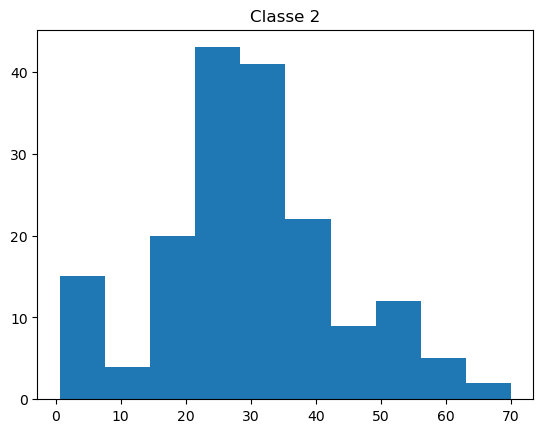

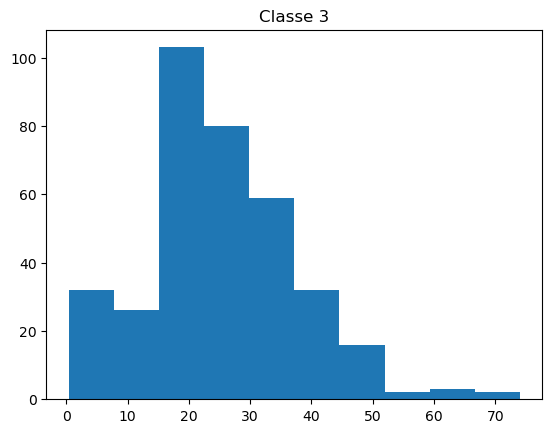

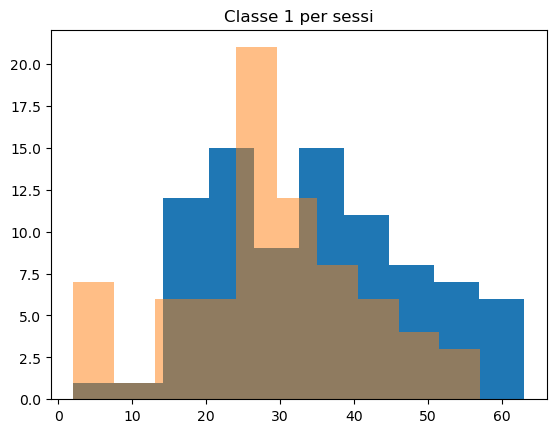

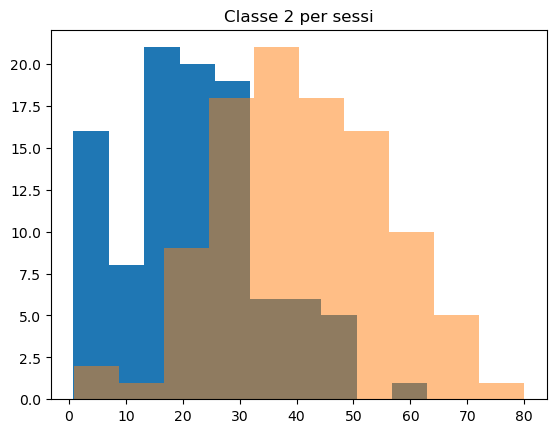

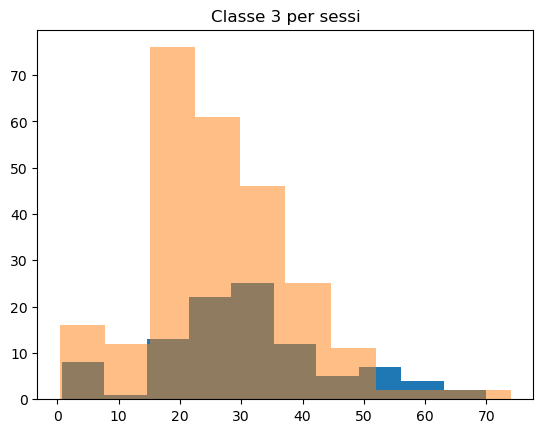

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
116,117,0,3,"Connors, Mr. Patrick",male,70.50,0,0,370369,7.7500,NaN,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.00,0,0,PC 17609,49.5042,NaN,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.00,0,0,PC 17754,34.6542,A5,C
851,852,0,3,"Svensson, Mr. Johan",male,74.00,0,0,347060,7.7750,NaN,S


In [ ]:
print(df.size, len(df.columns))
a = df["Embarked"]
vprina = a.value_counts().idxmax() #valore piu ricorrente in df[embarked]
df["Embarked"] = df["Embarked"].fillna(vprina) #fill nan con vprina
df = df.dropna(subset = "Age") #rimuove i valori mancanti AGE
df = df.drop_duplicates() #duplicati
am = df["Age"].mean() #non ci sono valori duplicati in quanto sono stati rimossi
print(am) #eta media
df = df.sort_values("Age")
classi = [df[df["Pclass"] == 1], df[df["Pclass"] == 2], df[df["Pclass"] == 3]]
plt.hist(classi[0]["Age"]) #rappresento tutti i possibili svariati grafici
plt.title("Classe 1")
plt.show()
plt.hist(classi[1]["Age"])
plt.title("Classe 2")
plt.show()
plt.hist(classi[2]["Age"])
plt.title("Classe 3")
plt.show()
classips = [classi[0][classi[0]["Sex"] == "female"], classi[1][classi[1]["Sex"] == "female"], classi[2][classi[2]["Sex"] == "female"], classi[0][classi[0]["Sex"] == "male"], classi[1][classi[1]["Sex"] == "male"], classi[2][classi[2]["Sex"] == "male"]]
plt.hist(classips[0]["Age"])
plt.hist(classips[1]["Age"], alpha= 0.5)
plt.title("Classe 1 per sessi")
plt.show()
plt.hist(classips[2]["Age"])
plt.hist(classips[3]["Age"], alpha= 0.5)
plt.title("Classe 2 per sessi")
plt.show()
plt.hist(classips[4]["Age"])
plt.hist(classips[5]["Age"], alpha= 0.5)
plt.title("Classe 3 per sessi")
plt.show()

## 3. Analisi del Dataset Iris

- Esplora la distribuzione delle specie (conta quanti campioni ci sono per specie)
- Calcola la lunghezza e la larghezza media dei petali per specie
- Visualizza le dimensioni dei petali per specie (scatterplot)
- Crea una nuova colonna per l'area del petalo e analizzala
- Grafico della distribuzione dell'area del petalo per specie (boxplot)

In [211]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"
df = pd.read_csv(url)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


setosa 1.4620000000000002 0.24599999999999997


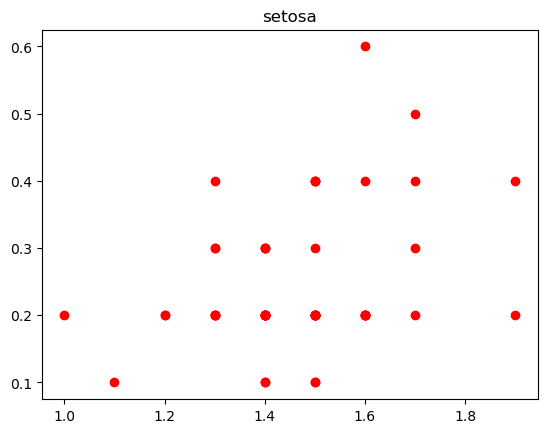

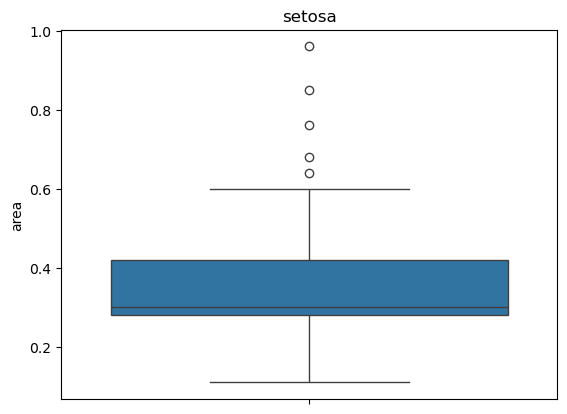

versicolor 4.26 1.3259999999999998


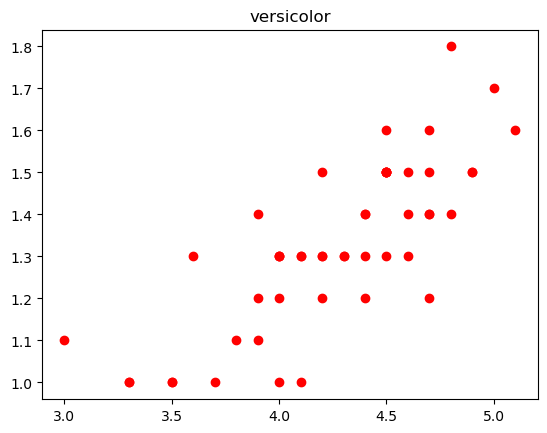

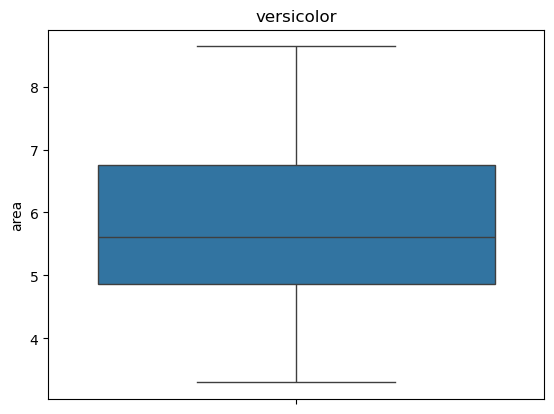

virginica 5.5520000000000005 2.0260000000000002


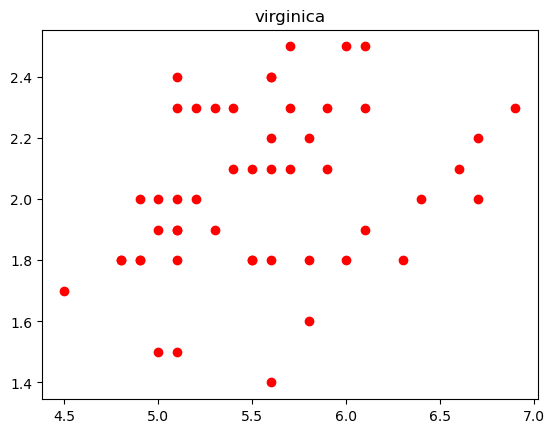

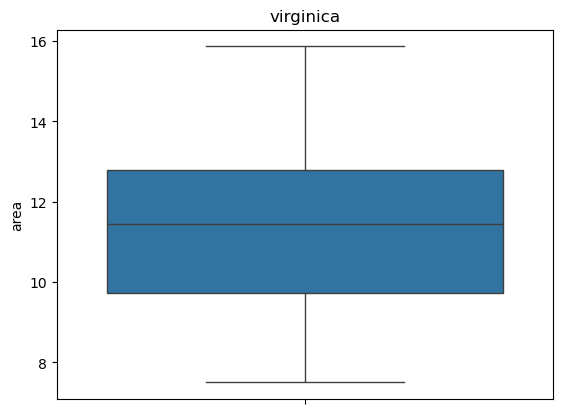

In [233]:
spuniq = []
for i in list(df["species"].unique()):
    spuniq.append(df[df["species"] == i])
for i in range(len(list(df["species"].unique()))):
    print(list(df["species"].unique())[i], spuniq[i]["petal_length"].mean(), spuniq[i]["petal_width"].mean()) #media della lunghezza e larghezza per fiore
    plt.scatter(spuniq[i]["petal_length"], spuniq[i]["petal_width"], c="red") #scatterplot
    #plt.scatter()
    plt.title(list(df["species"].unique())[i])
    plt.show()
    spuniq[i] = spuniq[i].assign(area = spuniq[i]["petal_length"] * spuniq[i]["petal_width"]) #Uhh presumo che i petali siano quadrati 
    sns.boxplot(spuniq[i]["area"])
    plt.title(list(df["species"].unique())[i])
    plt.show()